# Statistical Inference

In [2]:
import numpy as np
import random
import math
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Expected Value

Suppose that a die is rolled and X is the number face up. What is the Expected Value of X?

In [3]:
x=0
for i in range(6):
    x=x+((i+1)*(1/6))
print('Expected value of X is',x)

Expected value of X is 3.5


## Variance

In [4]:
y=0
for i in range(6):
    y=y+(((i+1)**2)*(1/6))
variance=y-(x**2)
print('Variance of random variable is',variance)

Variance of random variable is 2.916666666666666


## Binomial Distribution

According to a 2013 Gallup poll, worldwide only 13% of employees are engaged at work (psychologically committed to their jobs and likely to be making positive contributions to their organizations). Among a random sample of 10 employees, what is the probability that 8 of them are engaged at work?

In [5]:
sample_size=10
p=0.13
k=8
binom.pmf(k, sample_size, p)

2.7784196222620523e-06

## Normal Distribution

Suppose weights of checked baggage of airline passengers follow a nearly normal distribution with mean 45 pounds and standard deviation 3.2 pounds. Most airlines charge a fee for baggae that weigh in excess of 50 pounds.

What percent of airline passengers are expected to incur this fee?

In [6]:
baggage=50
mean=45
std=3.2
1-norm.cdf(baggage,mean,std)

0.059085122932667544

The average daily high temperature in june in LA is 77 F with a standard deviation of 5 F. Suppose that the temperature in June closely follow a normal distribution.
How cold are the coldest 20% of the days during June in LA?

In [7]:
coldest_days=0.20
mean=77
std=5
norm.ppf(coldest_days,mean,std)

72.79189383213543

## Poisson Distribution

We flip a coin with success probability 0.01 five hundred times. What’s the probability of 2 or fewer successes?

In [8]:
k=2
prob_sucess=500*0.01
poisson.cdf(k,prob_sucess)

0.12465201948308108

The number of people that show up at a bus stop is Poisson with a mean of 2.5 per hour. If watching the bus stop for 4 hours, what is the probability that 3 or fewer people show up for the whole time?

In [9]:
k=3
p=2.5*4
poisson.cdf(k,p)

0.010336050675925726

## Central Limit Theorem and Sampling

### Normal Distribution

Population Mean:-0.011409008247320997
Population SD:1.9885073887286857


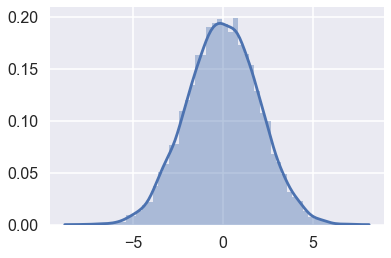

In [10]:
s = np.random.normal(0, 2, 10000)
print("Population Mean:"+str(np.mean(s)))
print("Population SD:"+str(np.std(s)))
sns.set_context("poster")
sns.distplot(s)

Point Estimate:-0.01562924659016618
Standard Error:0.36305011752413174


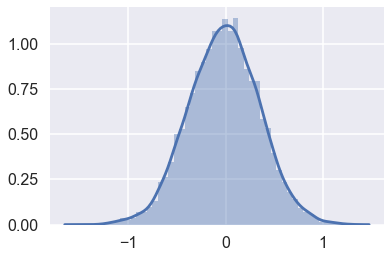

In [11]:
sample_size=30
samples = [ np.mean(random.choices(s, k=sample_size)) for _ in range(10000) ]
print("Point Estimate:"+str(np.mean(samples)))
print("Standard Error:"+str(np.std(s)/math.sqrt(sample_size)))
sns.distplot(samples)
plt.show()

### Skewed Distribution

Population Mean:7.916584426832753
Population SD:5.606305725616103


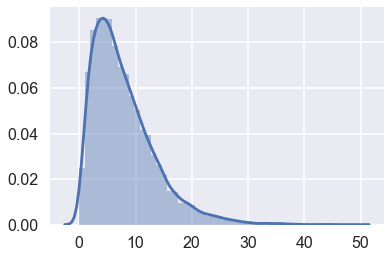

In [12]:
s = np.random.gamma(2,4,10000)
print("Population Mean:"+str(np.mean(s)))
print("Population SD:"+str(np.std(s)))
sns.distplot(s)

Point Estimate:7.8969019325168
Standard Error:1.0235667033967693


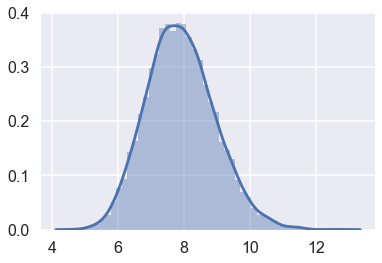

In [13]:
sample_size=30
samples = [ np.mean(random.choices(s, k=sample_size)) for _ in range(10000) ]
print("Point Estimate:"+str(np.mean(samples)))
print("Standard Error:"+str(np.std(s)/math.sqrt(sample_size)))
sns.distplot(samples)
plt.show()

### Uniform Distribution

Population Mean:5.009053498534228
Population SD:2.892000864988378


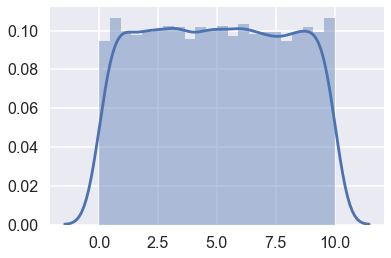

In [14]:
s = np.random.uniform(0,10,10000)
print("Population Mean:"+str(np.mean(s)))
print("Population SD:"+str(np.std(s)))
sns.distplot(s)

Point Estimate:5.008528763763656
Standard Error:0.528004703359529


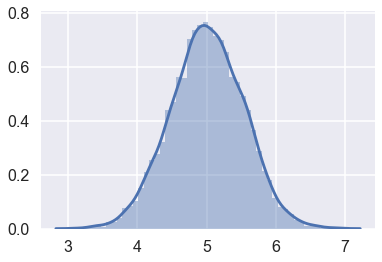

In [15]:
sample_size=30
samples = [ np.mean(random.choices(s, k=sample_size)) for _ in range(10000) ]
print("Point Estimate:"+str(np.mean(samples)))
print("Standard Error:"+str(np.std(s)/math.sqrt(sample_size)))
sns.distplot(samples)
plt.show()

### Example 1

In [16]:
import pandas as pd
data=pd.read_csv('music.csv')
music=data.copy()

In [17]:
music['duration_min']=music['duration']/60

Suppose my IPod has 10000 songs. The histogram below shows the distribution of the lengths of these songs. We also know that  for this IPod the mean length is 3.86 minutes and the standard deviation is 1.49. 

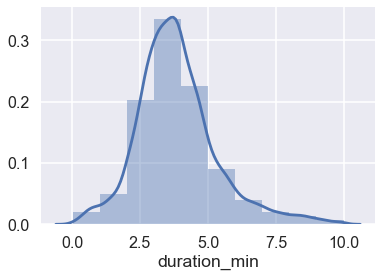

In [18]:
sns.distplot(music['duration_min'],bins=10)

Calculate the probabilty that a randomly selected song lasts more than 5 minutes.

In [19]:
music_duration_min=music['duration_min'].values
music_greater5=music_duration_min>5

In [20]:
p_music_greater5=(np.sum(music_greater5))/10000
p_music_greater5

0.1701

#### Why didn't we apply techniques of Normal Distribution?



### Example 2

I'm about to take trip to visit my parents and the drive is 6.5 hours. I make a random playlist of 200 songs. 

What is the probability that my playlist lasts the entire drive?

* So 6.5 hours = 390 minutes
* P(X1+X2+X3+.....+X200 > 390 minutes) = ?
* P(x > 3.9) = ?           
* x is the mean of sampling distributon

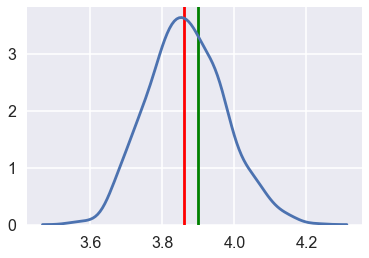

In [21]:
random_songs = [ np.mean(random.choices(music['duration_min'], k=200)) for _ in range(1000) ]
sns.distplot(random_songs,hist=False)
plt.vlines(np.mean(music['duration_min']),colors='red',ymin=0,ymax=4)
plt.vlines(3.9,colors='green',ymin=0,ymax=4)

Let's consider if sampling distribution is normal then population mean and point estimate are same

Calculating Standard Error (SE):

In [22]:
SE=(np.std(music['duration_min']))/((200)**(0.5))
SE

0.10534019582095491

In [23]:
Z = (3.9-np.mean(music['duration_min']))/SE
Z

0.37172700010818965

In [24]:
p = 1-Z
p

0.6282729998918104

## Confidence Interval

Let's create population from "music" dataset

In [25]:
population_songs = music.copy()
population_songs.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,...,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year,duration_min
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0,0.643,0.58521,0.834,0.58521,218.93179,...,0.779,0.28519,92.198,hip hop,1.000000,4,0.778,I Didn't Mean To,0,3.648863
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1,0.007,0.71054,1.000,0.20627,148.03546,...,0.969,0.20627,121.274,blue-eyed soul,1.000000,4,0.384,Soul Deep,1969,2.467258
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0,0.980,0.73152,0.980,0.73152,177.47546,...,0.482,0.42132,100.070,salsa,1.000000,1,0.000,Amor De Cabaret,0,2.957924
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1,0.017,1.30621,0.809,0.81002,233.40363,...,0.601,0.56254,119.293,pop rock,0.988584,4,0.000,Something Girls,1982,3.890060
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0,0.175,1.06368,0.883,0.13576,209.60608,...,1.000,0.13576,129.738,pop punk,0.887288,4,0.562,Face the Ashes,2007,3.493435


Let's calculate a 95% confidence for our mean point estimate:

In [26]:
sample_size=200
sample_means =np.mean(random.choices(population_songs['duration_min'], k=sample_size))

In [27]:
# Get the z-critical value*
z_critical = norm.ppf(0.025)

In [28]:
print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = np.std(population_songs['duration_min'])  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_means - margin_of_error,
                       sample_means + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)
print("Population Mean:")
print(np.mean(population_songs['duration_min']))

z-critical value:
-1.9599639845400545
Confidence interval:
(4.114811353266802, 3.701885373399865)
Population Mean:
3.860842205016667


Notice that the confidence interval we calculated captures the true population mean

Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

In [29]:
sample_size = 200

intervals = []
sample_means = []

for i in range(25):
    sample_mean =np.mean(random.choices(population_songs['duration_min'], k=sample_size))
    sample_means.append(sample_mean)
    z_critical = norm.ppf(0.025)
    pop_stdev = np.std(population_songs['duration_min'])  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_means - margin_of_error,sample_means + margin_of_error)     
    intervals.append(confidence_interval)

In [30]:
err_list=[]
for top,bot in intervals:
    err=(top-bot)/2
    err_list.append(err)

In [31]:
len(err_list[24])

25

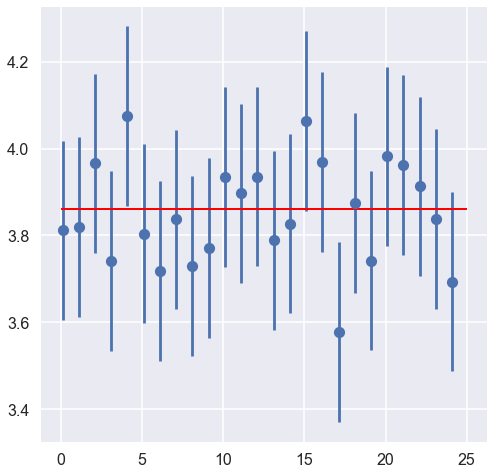

In [32]:
plt.figure(figsize=(8,8))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=err_list[24],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=3.861, 
           linewidth=2.0,
           color="red")

### Example 1

A sample of **50 college students** were asked how many exlusive relationships they've been in so far. The students in the sample had an **average of 3.2** exclusive relationships, with a **standard deviation of 1.74**. In addition, the sample distribution was only slighly skewed to the right. Estimate the true average number of exclusive relationships based on this sample using a 95% confidence interval.

In [33]:
n=50
sample_mean=3.2
s=1.74

In [34]:
SE = 1.74/math.sqrt(n)
SE

0.24607315985291853

In [35]:
z_critical=norm.ppf(0.025)
z_critical

-1.9599639845400545

In [36]:
(sample_mean+z_critical*SE,sample_mean-z_critical*SE)

(2.717705469126312, 3.6822945308736883)

We are 95% confident that the college students on average have been in 2.72 to 3.68 exclusive relationships

### Example 2

A group of reseachers want to test the possible effect of an epilepsy medication taken by pregnant mothers on the cognitive development of their children. As evidence, the want to estimate the IQ score of three-year-old children born to mothers who were on this medication during pregnancy

Previous studies suggest that the **SD of IQ Scores of three year old children is 18 points**. 

How many such children should the researhers sample in order to obtain a **90% cofidence interval** with a **margin error less than or equal to 4**.

In [37]:
#CI=90%
ME=4
z_critical=abs(norm.ppf(0.05))
std=18

In [38]:
z_critical

1.6448536269514729

In [39]:
n=((z_critical*std)/ME)**2
n

54.78725494543216

We need at least 55 such children in the sample obtain a margin error of 4 points

We found that we needed at least 55 children in the sample to achieve a maximum margin of error of 4 points. How would the required size change if we want to futher decrease the margin of error to 2 points?

In [40]:
# 1/2 * ME = z* s/sqrt(n) * 1/2
# 1/2 * ME = z* s/sqrt(4n)
4*n

219.14901978172864

It's 220 at least

# Hypothesis Testing


## Example 1
Researches investigating characteristics of gifted children collected data from schools in a larage city on a random sample of thirty-six children who were identified as gifted children soon after they reached the age of four. In this study, along with variables on the children, the researchers also collected data on their mothers' IQ scores. The histogram shows the distribution of these data, and also provided are some sample statistics.

In [41]:
n=36
min_=101
mean=118.2
sd=6.5
max_=131


Perform a hypothesis test to evaluate if these data provide convincing evidence of a difference between the average IQ score of mothers of gifted children and the average IQ score for the population at large, which is 100. Use a significance level of 0.01

u0=100
ua != 100

Calculate the point estimate

In [3]:
mean

118.2

Check conditions
* random & 36 < 10% of all gifted children -> independence
* n>30 & sample not skewed -> nearly normal sampling distribution

In [4]:
import math as mt
X=sd/mt.sqrt(n)
X

1.0833333333333333

Calculate test statistic

In [6]:
u0=100
Z=(mean-u0)/X

In [7]:
Z

16.800000000000004

In [8]:
import scipy.stats
p_values = scipy.stats.norm.sf(abs(Z))

In [9]:
p_values

1.2202200405975265e-63

#### Make a decision, and interpret it in context of the research question.

p-value is very low -> strong evidence against the null

We reject the null hypothesis and conclude that the data provide convincing evidence of a difference between the average IQ score of mothers of gifted children and the average IQ score for the population at large.

## Example 2

A statistics student interested in sleep habits of domestic cats took a random sample of 144 cats and monitored their sleep. _The cats slept an average of 16 hours/day_. According to online resources _domestic dogs sleep, on average, 14 hours a day_. We want to find out if these data provide convincing evidence of different sleeping habits for domestic cats and dogs with respect to how much they sleep. The test statistic is 1.73.

In [10]:
x=16
U0=14

In [11]:
#calculate P-Value
Z=1.73
p_values = scipy.stats.norm.sf(abs(Z))

In [12]:
p_values

0.04181513761359493

In [13]:
p_values*2

0.08363027522718985

#### What is the interpretation of this p-value in context of these data?
<br>p(obtaining a random sample of 144 cats that sleep 16 hours or more or 12 hours or less, on average, if in fact cats truly slept 14 hours per day on average) = 0.0836

## Inference for other estimators

A 2010 Pew Research foundation poll indicates that among 1,099 college graduates, **33% watch The Daily Show (an American late-night TV show)**.
**The standard error of this estimate is 0.014.** Estimate the 95% confidence interval for the proportion of college graduates who watch The Daily Show.

In [55]:
p_watch=0.33
SE=0.014
z_critical=abs(norm.ppf(0.05))
z_critical

1.6448536269514729

In [56]:
interv=z_critical*0.014

**Confidence Interval**

In [57]:
(0.33-interv,0.33+interv)

(0.3069720492226794, 0.35302795077732063)